/var/folders/gb/xncdl8px3cn3zv0m53x6vb6m0000gn/T/ipykernel_10926/2847381118.py:20: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_chunk_1 = pd.read_csv("../data/permits_1_data.csv")
/var/folders/gb/xncdl8px3cn3zv0m53x6vb6m0000gn/T/ipykernel_10926/2847381118.py:21: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_chunk_2 = pd.read_csv("../data/permits_2_data.csv")


[1803, 2108, 2109, 2110, 2111, 2113, 2114, 2115, 2116, 2118, 2119, 2120, 2121, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2134, 2135, 2136, 2151, 2199, 2210, 2215, 2467]


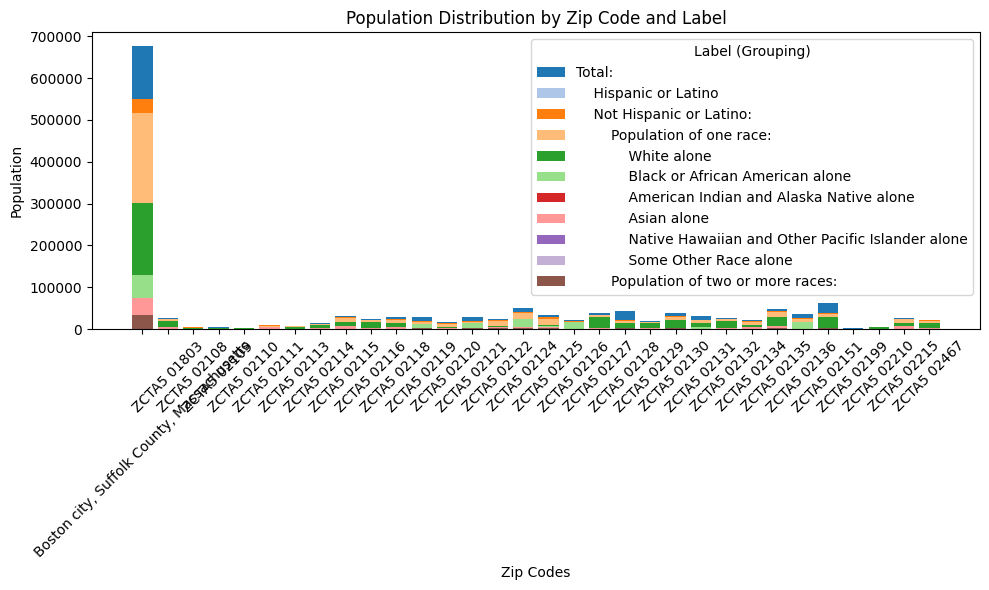

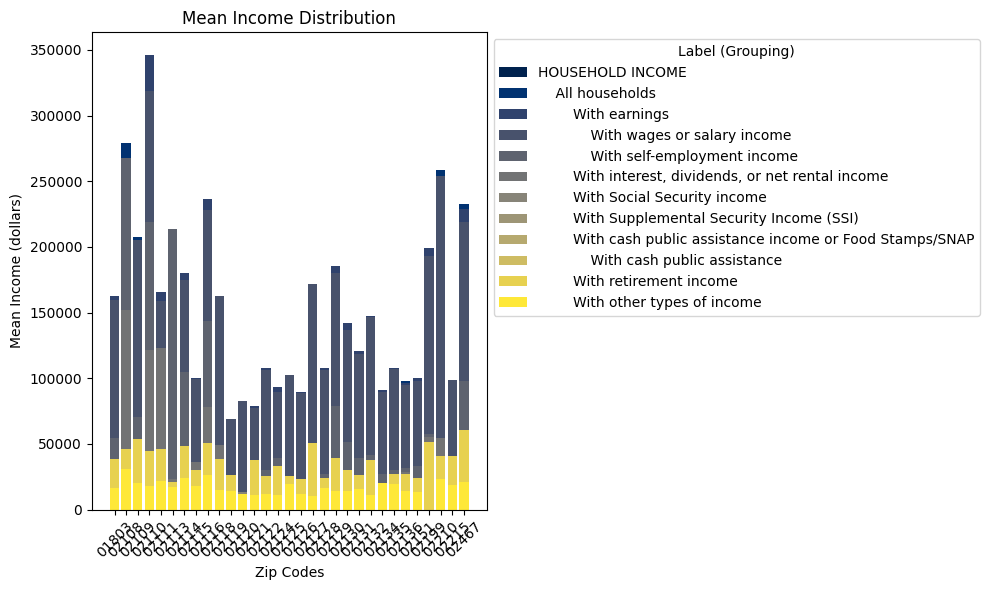

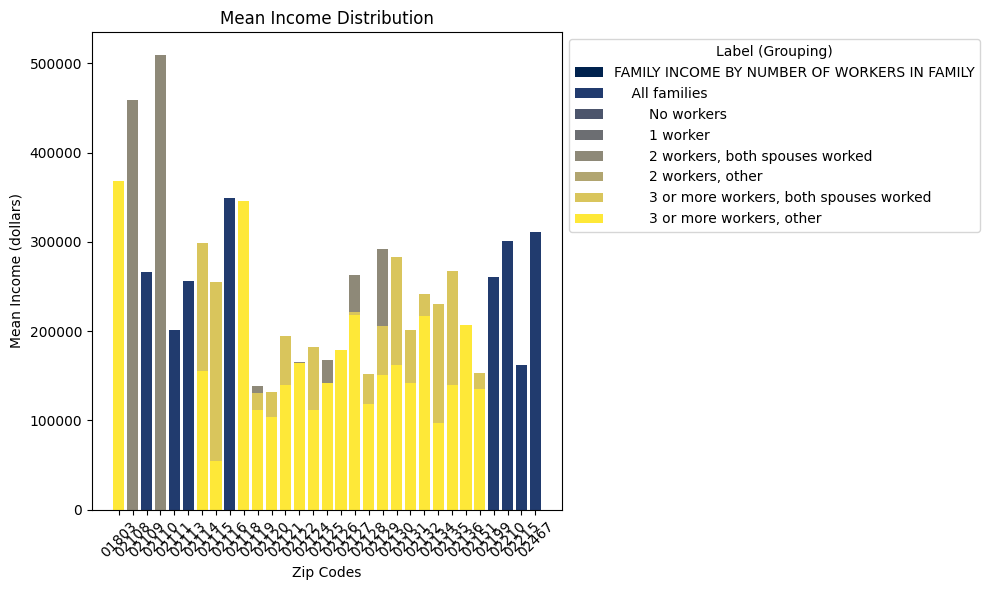

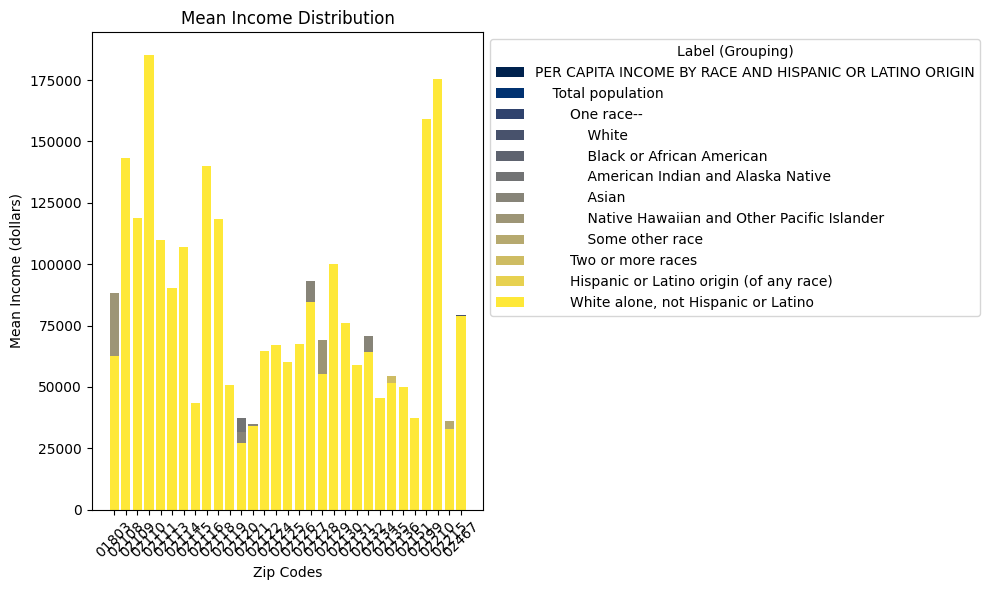

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

zoning = pd.read_csv("../data/zoning_data.csv")
def extract_unique_zip_codes(zoning):
    if 'zip' in zoning.columns:
        unique_zip_codes = zoning['zip'].unique()
        return unique_zip_codes
    else:
        print("Column 'zip' not found in the DataFrame.")
        return None

# Assuming 'data' is your DataFrame
unique_zips_zoning = extract_unique_zip_codes(zoning)


# Convert each CSV file to a Dataframe.
data_chunk_1 = pd.read_csv("../data/permits_1_data.csv")
data_chunk_2 = pd.read_csv("../data/permits_2_data.csv")
data_chunk_3 = pd.read_csv("../data/permits_3_data.csv")

# Concatenate into one Dataframe
permits = pd.concat([data_chunk_1, data_chunk_2, data_chunk_3], ignore_index=True)
unique_zips_permit = extract_unique_zip_codes(permits)

def combine_and_get_unique_zipcodes(list1, list2):
    # Flatten the lists if they contain nested arrays
    list1 = pd.Series(np.concatenate(list1) if isinstance(list1[0], np.ndarray) else list1)
    list2 = pd.Series(np.concatenate(list2) if isinstance(list2[0], np.ndarray) else list2)

    # Use set to ensure uniqueness, and filter based on zip code criteria
    unique_zipcodes = set()

    # Add elements from list1, converting to integers
    unique_zipcodes.update(filter(lambda x: str(x).isdigit() and len(str(x)) >= 4, list1.apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notna(x) else None)))

    # Add elements from list2, converting to integers
    unique_zipcodes.update(filter(lambda x: str(x).isdigit() and len(str(x)) >= 4, list2.apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notna(x) else None)))

    return sorted(unique_zipcodes)

unique_zips = combine_and_get_unique_zipcodes(unique_zips_zoning, unique_zips_permit)
print(unique_zips)

df = pd.read_csv('../data/selected_race_census_data.csv', thousands=',', encoding='utf-8')

# Extracting relevant data for plotting
labels = df.iloc[:, 0].values

# Convert columns to strings before applying .str.replace
data = df.iloc[:, 1:].apply(lambda x: x.astype(str).str.replace(',', '').astype(float)).values

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.tab20.colors  # You can choose a different colormap as needed

for i, label in enumerate(labels):
    ax.bar(df.columns[1:], data[i], label=label, color=colors[i])

ax.set_xlabel('Zip Codes')
ax.set_ylabel('Population')
ax.set_title('Population Distribution by Zip Code and Label')
ax.legend(title='Label (Grouping)', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

my_data = pd.read_csv('../data/selected_income_census_data.csv', thousands=',', encoding='utf-8')

# Define the ranges for the three graphs
ranges = [(0, 12), (12, 20), (20, 33)]

for start, end in ranges:
    # Extract relevant columns for the current range
    labels = my_data.iloc[start:end, 0].values
    # Identify columns related to "Mean income (dollars)!!Estimate"
    mean_income_columns = [col for col in my_data.columns if 'Mean income (dollars)!!Estimate' in col]
    data = my_data.loc[start:end - 1, mean_income_columns].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce').values
    
    mean_income_columns = [re.sub(r'ZCTA5 (\d+)!!Mean income \(dollars\)!!Estimate', r'\1', col) for col in mean_income_columns]

    # Plotting with cividis color map
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.cm.cividis(np.linspace(0, 1, len(data)))

    for i, label in enumerate(labels):
        ax.bar(mean_income_columns, data[i, :], label=label, color=colors[i])

    ax.set_xlabel('Zip Codes')
    ax.set_ylabel('Mean Income (dollars)')
    ax.set_title(f'Mean Income Distribution')
    ax.legend(title='Label (Grouping)', bbox_to_anchor=(1, 1))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()